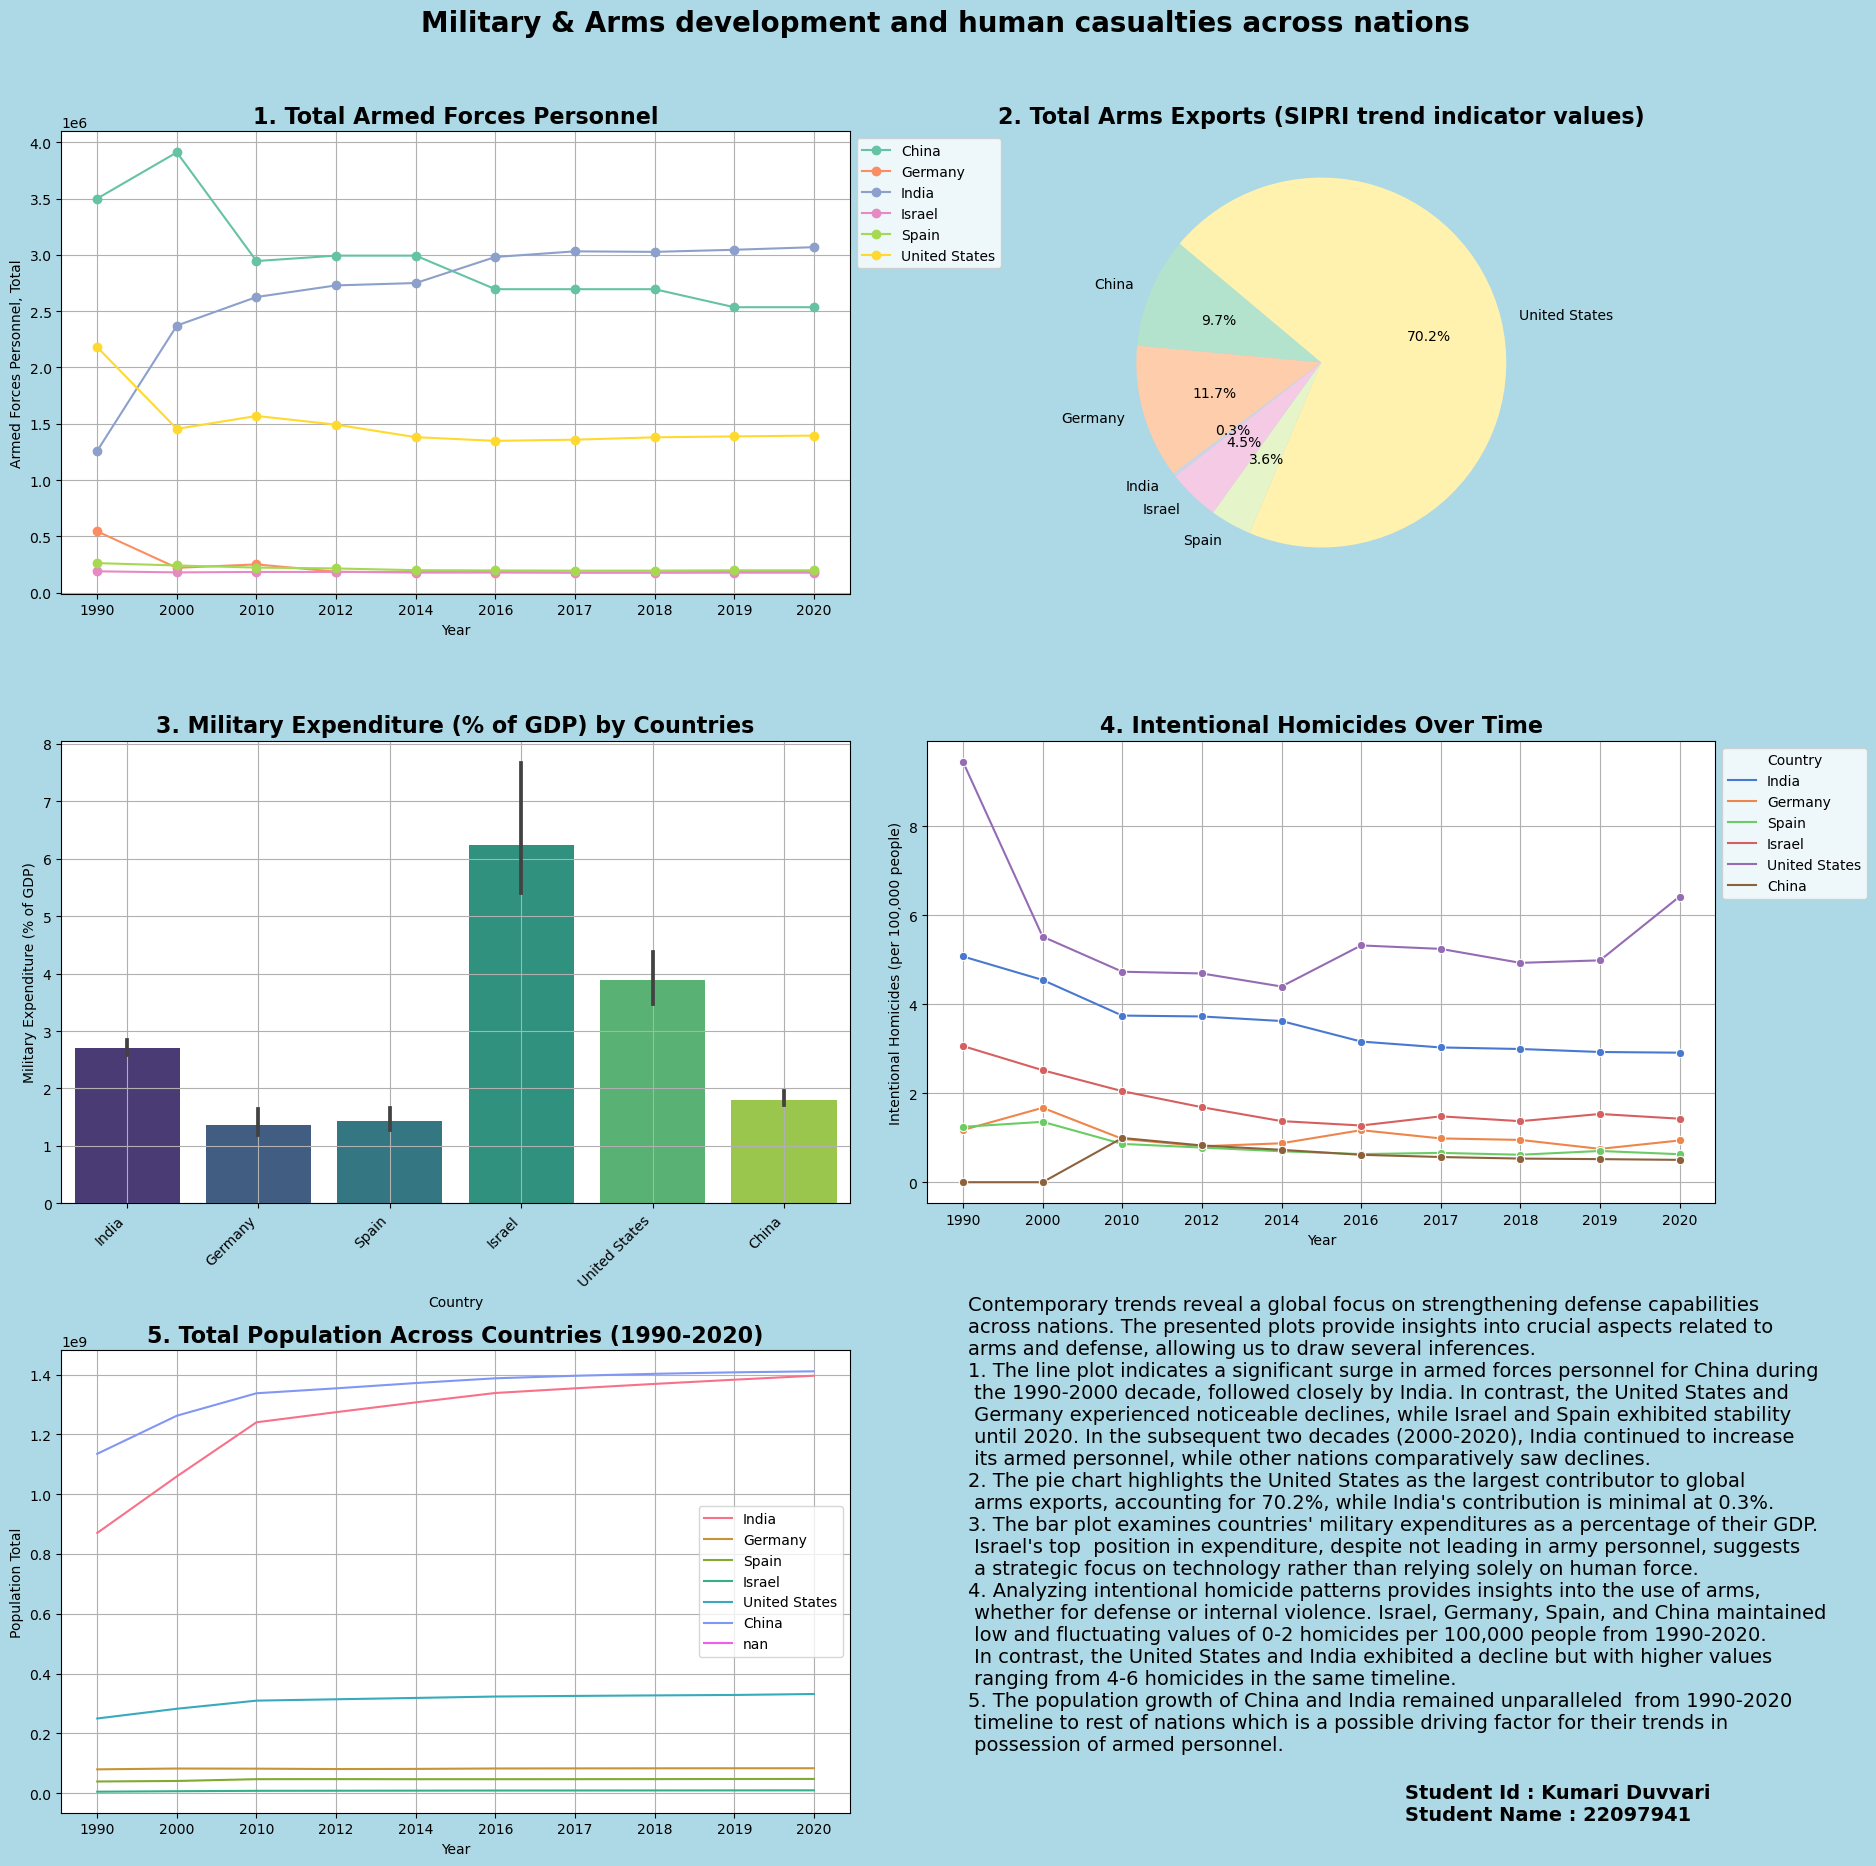

In [5]:
#Data source link : #https://databank.worldbank.org/source/world-development-indicators
#Github Link : #https://github.com/kumari55/Data-Handling-and-Visualisation.git

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the CSV file
df = pd.read_csv("World_Development_Indicators_K.csv")

# Set up the 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(19, 19),facecolor='lightblue')
fig.suptitle('Military & Arms development and human casualties across nations', fontsize=20,fontweight='bold')

# Plot 1: Total Armed Forces Personnel
# Grouping data by 'Year' and 'Country Name', then summing up the 'Armed forces personnel, total' for each country
total_personnel_by_country = df.groupby(['Year', 'Country Name'])['Armed forces personnel, total'].sum().unstack()
for i, (country, color) in enumerate(zip(total_personnel_by_country.columns, sns.color_palette("Set2", n_colors=len(total_personnel_by_country.columns)))):
    axes[0, 0].plot(total_personnel_by_country.index, total_personnel_by_country[country], label=country, marker='o', color=color)
axes[0, 0].set_title('1. Total Armed Forces Personnel',fontweight='bold',fontsize=16)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Armed Forces Personnel, Total')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0, 0].grid(True)

# Plot 2: Total Arms Exports (Pie Chart)
# Grouping data by 'Year' and 'Country Name', then summing up the the 'Arms exports (SIPRI trend indicator values)' for each country
total_arms_exports_by_country = df.groupby(['Year', 'Country Name'])['Arms exports (SIPRI trend indicator values)'].sum().unstack()
total_arms_exports = total_arms_exports_by_country.sum()
axes[0, 1].pie(total_arms_exports, labels=total_arms_exports.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Pastel2"))
axes[0, 1].set_title('2. Total Arms Exports (SIPRI trend indicator values)',fontweight='bold',fontsize=16)

# Plot 3: Military Expenditure (% of GDP) by Country
data = df[['Country Name', 'Military expenditure (% of GDP)']]
sns.barplot(x='Country Name', y='Military expenditure (% of GDP)', data=data, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('3. Military Expenditure (% of GDP) by Countries',fontweight='bold',fontsize=16)
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Military Expenditure (% of GDP)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].grid(True)

# Plot 4: Intentional Homicides Over Time
data_homicides = df[['Year', 'Country Name', 'Intentional homicides (per 100,000 people)']]
sns.lineplot(x='Year', y='Intentional homicides (per 100,000 people)', hue='Country Name', data=data_homicides, marker='o', ax=axes[1, 1], palette="muted")
axes[1, 1].set_title('4. Intentional Homicides Over Time',fontweight='bold',fontsize=16)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Intentional Homicides (per 100,000 people)')
axes[1, 1].legend(title='Country', bbox_to_anchor=(1, 1))
axes[1, 1].grid(True)

# Plot 5: Total Population Across Countries
countries = df['Country Name'].unique()
for i, (country, color) in enumerate(zip(countries, sns.color_palette("husl", n_colors=len(countries)))):
    country_data = df[df['Country Name'] == country]
    axes[2, 0].plot(country_data['Year'], country_data['Population, total'], label=country, color=color)
axes[2, 0].set_title('5. Total Population Across Countries (1990-2020)',fontweight='bold',fontsize=16)
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Population Total')
axes[2, 0].legend()
axes[2, 0].grid(True)

text1 =  "Contemporary trends reveal a global focus on strengthening defense capabilities \n" \
         "across nations. The presented plots provide insights into crucial aspects related to \n" \
         "arms and defense, allowing us to draw several inferences. \n" \
         "1. The line plot indicates a significant surge in armed forces personnel for China during \n" \
         " the 1990-2000 decade, followed closely by India. In contrast, the United States and \n" \
         " Germany experienced noticeable declines, while Israel and Spain exhibited stability  \n" \
         " until 2020. In the subsequent two decades (2000-2020), India continued to increase  \n" \
         " its armed personnel, while other nations comparatively saw declines. \n" \
         "2. The pie chart highlights the United States as the largest contributor to global \n" \
         " arms exports, accounting for 70.2%, while India's contribution is minimal at 0.3%. \n" \
         "3. The bar plot examines countries' military expenditures as a percentage of their GDP. \n" \
         " Israel's top  position in expenditure, despite not leading in army personnel, suggests \n" \
         " a strategic focus on technology rather than relying solely on human force. \n" \
         "4. Analyzing intentional homicide patterns provides insights into the use of arms,  \n" \
         " whether for defense or internal violence. Israel, Germany, Spain, and China maintained \n" \
         " low and fluctuating values of 0-2 homicides per 100,000 people from 1990-2020. \n" \
         " In contrast, the United States and India exhibited a decline but with higher values \n" \
         " ranging from 4-6 homicides in the same timeline. \n" \
         "5. The population growth of China and India remained unparalleled  from 1990-2020  \n" \
         " timeline to rest of nations which is a possible driving factor for their trends in \n" \
         " possession of armed personnel.\n" \

# Plot 6: Data Description Text
axes[2, 1].text(0.6, 0.6, text1, ha='center', va='center', fontsize=14, color='black', multialignment='left')
axes[2, 1].axis('off')  # Turn off axis for the text subplot

text2 = "Student Id : Kumari Duvvari\n" \
        "Student Name : 22097941"
axes[2, 1].text(0.8, 0.02, text2, ha='center', va='center', fontsize=14, color='black', multialignment='left', fontweight='bold')
axes[2, 1].axis('off') 
# Remove empty subplot in the last row and column
#fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig("22097941.png", dpi=300)
plt.show()